[[ 0. ]
 [ 0.5]]
y.shape = 
(990,)
len(T) = 
990
B.shape = 
(1, 2)
u.shape = 
(2, 990)
s.shape = 
(990,)


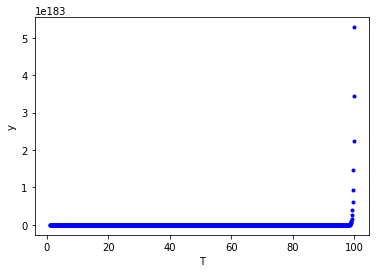

In [58]:
import numpy as np
import matplotlib.pyplot as plt
 
def simulate(A, B, C, D, regulator_func, s, T, x0=0):
    # u = *regulator(x, s)
    # x1 = A*x + B*u
    # y = C*x + D*u
    if type(x0) is int:
        xt = np.matrix([x0]*len(A)).T
        print "x0 = \n{}".format(xt)
    else:
        xt = x0
 
    y = np.zeros(len(T))# Initialize with C.dot(x0)?
    print "y.shape = \n",y.shape
    print "len(T) = \n",len(T)
    print "B.shape = \n",(B).shape
    
    #intitialize N dimentional matrix
    u = np.zeros((B.size,len(T)))
    print "u.shape = \n",u.shape
    
    
    print "s.shape = \n",s.shape
    
    for i, t in enumerate(T):
        u[:,[i]] = regulator_func(y[i], s[i], xt)
        x_dot = A.dot(xt) + B.dot(u[:,[i]])
        #print x_dot
        #print "C.shape = \n",C.shape
        #print "xt.shape = \n",xt.shape
        #print "D.shape = \n",D.shape
        y[i] = C.dot(xt) + (D.T).dot(u[:,[i]])
       
        if i < len(T)-1:
            xt = xt + x_dot*(T[i+1]-T[i])
    return y, u
 
 
A = np.matrix([[1, 2],[3, 4]]) # A: 2x2 matrix
B = np.matrix([0, 1]) # e.g., B: 1x2 matrix
C = np.matrix([1, 0]) # e.g., C: 1x2 matrix
D = np.matrix([[0], [0]]) # e.g., D: 2x1 matrix

regulator_func = con
T = np.arange(1, 100, 0.1) 
s = np.ones(len(T))
x0 = np.matrix([[0], [0]])
 

 

 
def con(y, s, x):
    return np.matrix([0, -1 * (y - s)]).T
print con(0, 0.5, 0)
 
y, u = simulate(A, B, C, D, regulator_func, s, T, x0)

plt.figure()
plt.plot(T, y, 'b.')
plt.xlabel('T')
plt.ylabel('y')
plt.show()